## SDXL Train DreamBooth_LoRA

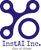
### InstAI assets, internal use only

## Instruction

1. Update folder paths, prompt and training parameters as you want
2. Click **Run all** in **Rumtime** to auto train

In [1]:
#@title Mount google drive and Install dependencies.
from google.colab import drive
drive.mount('/content/drive')

!pip install bitsandbytes accelerate>=0.16.0 torchvision transformers>=4.25.1 ftfy tensorboard Jinja2

!pip install peft==0.7.0

!pip install git+https://github.com/yinglingyang/diffusers.git

# download SDXL DreamBooth training script
!wget https://raw.githubusercontent.com/yinglingyang/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

!accelerate config default

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: peft
    Found existing installation: peft 0.18.0
    Uninstalling peft-0.18.0:
      Successfully uninstalled peft-0.18.0
  Cloning https://github.com/yinglingyang/diffusers.git to /tmp/pip-req-build-2sdrhotb
  Running command git clone --filter=blob:none --quiet https://github.com/yinglingyang/diffusers.git /tmp/pip-req-build-2sdrhotb
  Resolved https://github.com/yinglingyang/diffusers.git to commit 074e12358bc17e7dbe111ea4f62f05dbae8a49d5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2977467 sha256=9c77fd23323e5a84b705d6e33fd59504be259343f93a5bc8e9f9529e3bb93684
  Stored in directory: /tmp/pip-ephem-wheel-cache-3nq3z_o_/wheels/f8/6b/bc/2a89d67e0f4741b441ccacf2b77016b68006d18b98edc5d9

In [18]:
Original_images_Path = "/content/drive/MyDrive/ACV_Final/dataset"
Output_Path = "/content/drive/MyDrive/ACV_Final/model"

image_path = Original_images_Path
output_path = Output_Path

import os
os.makedirs(output_path, exist_ok=True)

!ls "$image_path"


a1.png	a2.png	a3.png	b1.png	b2.png	b3.png	c1.png	c2.png	c3.png


In [19]:
#@title Training Parameters

prompt = "ACV style of photo"#@param {type:"string"}
learning_rate = 1e-4 #@param {type:"number"}
resolution=512 #@param {type:"integer"}
max_train_steps=800 #@param {type:"integer"}
checkpointing_steps=200 #@param {type:"integer"}

In [20]:
#@title Start Training

#!/usr/bin/env bash
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --instance_data_dir=$image_path \
  --output_dir=$output_path \
  --mixed_precision="fp16" \
  --instance_prompt="$prompt" \
  --resolution=$resolution \
  --train_batch_size=2 \
  --gradient_accumulation_steps=2 \
  --gradient_checkpointing \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --use_8bit_adam \
  --max_train_steps=$max_train_steps \
  --checkpointing_steps=$checkpointing_steps \
  --seed="0"

2025-12-29 04:03:13.016707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766980993.036658   10480 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766980993.042624   10480 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766980993.058803   10480 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766980993.058830   10480 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766980993.058834   10480 computation_placer.cc:177] computation placer alr

In [ ]:
#@title End Runtime

from google.colab import runtime

runtime.unassign()